<a href="https://colab.research.google.com/github/Akshithkumarreddy/Machine_learning_AL/blob/main/sim_linear_regg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

Importing dataset

In [4]:
popu_df = pd.read_csv('population.csv')
X = popu_df.iloc[:, :-1].values
y = popu_df.iloc[:, -1].values

Sanity check of data

In [5]:
popu_df.head()

,Year,Yearly % \nChange,Yearly\nChange,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban\nPop %,Urban Population,Country's Share of\nWorld Pop,World Population,India\nGlobal Rank,Population
0,2050,0.23,3711367,NaN,38.1,2.24,551,53.5,876613025,16.84,9735033990,1,1639176033
1,2045,0.35,5585537,-414772.0,36.6,2.24,545,50.1,811749463,17.09,9481803274,1,1620619200
2,2040,0.50,7793541,-415736.0,35.0,2.24,536,46.7,744380367,17.31,9198847240,1,1592691513
3,2035,0.66,10016298,-415732.0,33.3,2.24,523,43.5,675456367,17.48,8887524213,1,1553723810
4,2030,0.80,11726140,-440124.0,31.7,2.24,506,40.4,607341981,17.59,8548487400,1,1503642322


In [6]:
popu_df.tail()

,Year,Yearly % \nChange,Yearly\nChange,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban\nPop %,Urban Population,Country's Share of\nWorld Pop,World Population,India\nGlobal Rank,Population
19,1975,2.33,13582621,421208.0,19.7,5.41,210,21.3,132533810,15.27,4079480606,2,623102897
20,1970,2.15,11213294,-68569.0,19.3,5.72,187,19.7,109388950,15.00,3700437046,2,555189792
21,1965,2.07,9715129,-17078.0,19.6,5.89,168,18.7,93493844,14.95,3339583597,2,499123324
22,1960,1.91,8133417,-30805.0,20.2,5.90,152,17.9,80565723,14.85,3034949748,2,450547679
23,1955,1.72,6711079,-21140.0,20.7,5.90,138,17.6,71958495,14.78,"2,77,30,19,936",2,409880595


In [7]:
popu_df.shape

(24, 13)

In [8]:
popu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Year                          24 non-null     int64  
 1   Yearly % 
Change              24 non-null     float64
 2   Yearly
Change                 24 non-null     int64  
 3   Migrants (net)                23 non-null     float64
 4   Median Age                    24 non-null     float64
 5   Fertility Rate                24 non-null     float64
 6   Density (P/Km²)               24 non-null     int64  
 7   Urban
Pop %                   24 non-null     float64
 8   Urban Population              24 non-null     int64  
 9   Country's Share of
World Pop  24 non-null     float64
 10  World Population              24 non-null     object 
 11  India
Global Rank             24 non-null     int64  
 12  Population                    24 non-null     int64  
dtypes: floa

In [9]:
popu_df.describe()

,Year,Yearly % \nChange,Yearly\nChange,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban\nPop %,Urban Population,Country's Share of\nWorld Pop,India\nGlobal Rank,Population
count,24.000000,24.000000,2.400000e+01,23.000000,24.000000,24.000000,24.000000,24.00000,2.400000e+01,24.000000,24.000000,2.400000e+01
mean,2005.000000,1.412917,1.286815e+07,-252570.869565,25.962500,3.479583,374.583333,31.53750,3.881687e+08,16.776250,1.791667,1.113504e+09
std,27.489128,0.666897,4.239948e+06,286175.441586,5.752188,1.447566,136.433745,10.10806,2.378749e+08,1.098227,0.414851,4.058605e+08
min,1955.000000,0.230000,3.711367e+06,-532687.000000,19.300000,2.240000,138.000000,17.60000,7.195850e+07,14.780000,1.000000,4.098806e+08
25%,1983.750000,0.995000,9.941006e+06,-500592.000000,20.675000,2.240000,256.750000,23.97500,1.829768e+08,15.995000,2.000000,7.630082e+08
50%,2012.500000,1.335000,1.387048e+07,-414772.000000,25.950000,2.600000,428.000000,31.75000,4.049070e+08,17.255000,2.000000,1.272217e+09
75%,2021.250000,2.010000,1.565104e+07,-25972.500000,28.800000,4.752500,469.500000,35.65000,4.980096e+08,17.702500,2.000000,1.396256e+09
max,2050.000000,2.330000,1.853059e+07,421208.000000,38.100000,5.900000,551.000000,53.50000,8.766130e+08,17.750000,2.000000,1.639176e+09


In [10]:
popu_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,24.0,2.005000e+03,2.748913e+01,1.955000e+03,1.983750e+03,2.012500e+03,2.021250e+03,2.050000e+03
Yearly % \nChange,24.0,1.412917e+00,6.668973e-01,2.300000e-01,9.950000e-01,1.335000e+00,2.010000e+00,2.330000e+00
Yearly\nChange,24.0,1.286815e+07,4.239948e+06,3.711367e+06,9.941006e+06,1.387048e+07,1.565104e+07,1.853059e+07
Migrants (net),23.0,-2.525709e+05,2.861754e+05,-5.326870e+05,-5.005920e+05,-4.147720e+05,-2.597250e+04,4.212080e+05
Median Age,24.0,2.596250e+01,5.752188e+00,1.930000e+01,2.067500e+01,2.595000e+01,2.880000e+01,3.810000e+01
Fertility Rate,24.0,3.479583e+00,1.447566e+00,2.240000e+00,2.240000e+00,2.600000e+00,4.752500e+00,5.900000e+00
Density (P/Km²),24.0,3.745833e+02,1.364337e+02,1.380000e+02,2.567500e+02,4.280000e+02,4.695000e+02,5.510000e+02
Urban\nPop %,24.0,3.153750e+01,1.010806e+01,1.760000e+01,2.397500e+01,3.175000e+01,3.565000e+01,5.350000e+01
Urban Population,24.0,3.881687e+08,2.378749e+08,7.195850e+07,1.829768e+08,4.049070e+08,4.980096e+08,8.766130e+08
Country's Share of\nWorld Pop,24.0,1.677625e+01,1.098227e+00,1.478000e+01,1.599500e+01,1.725500e+01,1.770250e+01,1.775000e+01


In [12]:
popu_df.describe(include='object')

,World Population
count,24
unique,24
top,9735033990
freq,1


Finding missing values

In [13]:
popu_df.isnull().sum()

,0
Year,0
Yearly % \nChange,0
Yearly\nChange,0
Migrants (net),1
Median Age,0
Fertility Rate,0
Density (P/Km²),0
Urban\nPop %,0
Urban Population,0
Country's Share of\nWorld Pop,0


In [14]:
popu_df.isnull().sum()/popu_df.shape[0]*100

,0
Year,0.000000
Yearly % \nChange,0.000000
Yearly\nChange,0.000000
Migrants (net),4.166667
Median Age,0.000000
Fertility Rate,0.000000
Density (P/Km²),0.000000
Urban\nPop %,0.000000
Urban Population,0.000000
Country's Share of\nWorld Pop,0.000000


Finding duplicated values


In [15]:
popu_df.duplicated().sum()

0

Filling Missing values

In [16]:
from sklearn.impute import KNNImputer
impute = KNNImputer()

In [17]:
for i in popu_df.select_dtypes(include='number').columns:
  popu_df[i] = impute.fit_transform(popu_df[[i]])

In [18]:
popu_df.isnull().sum()

,0
Year,0
Yearly % \nChange,0
Yearly\nChange,0
Migrants (net),0
Median Age,0
Fertility Rate,0
Density (P/Km²),0
Urban\nPop %,0
Urban Population,0
Country's Share of\nWorld Pop,0


Box plot to identiofy outliers

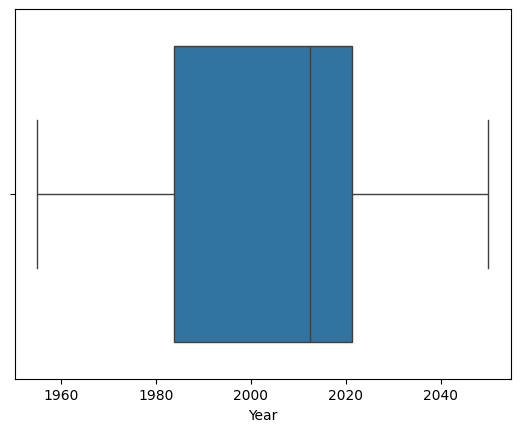

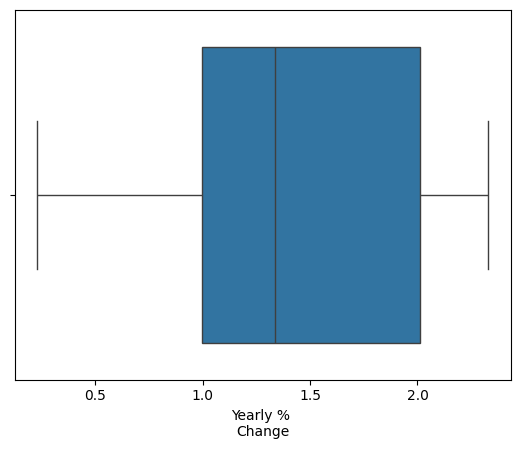

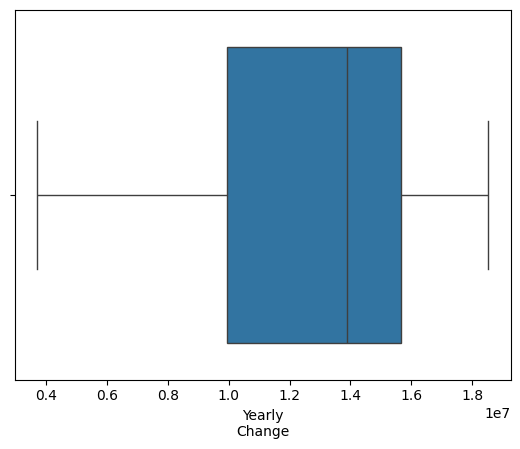

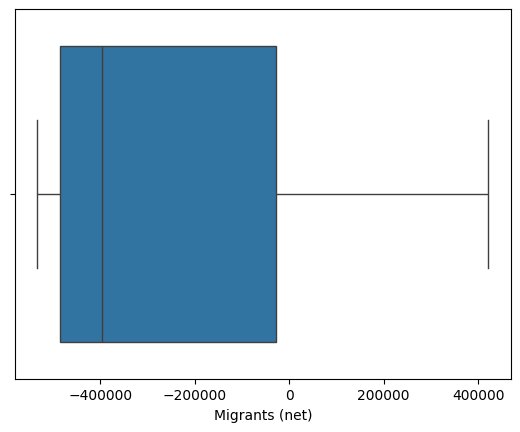

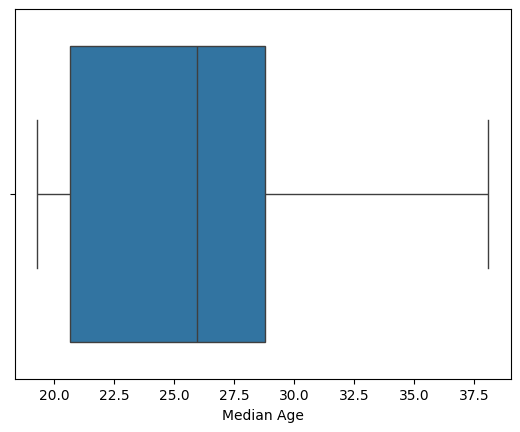

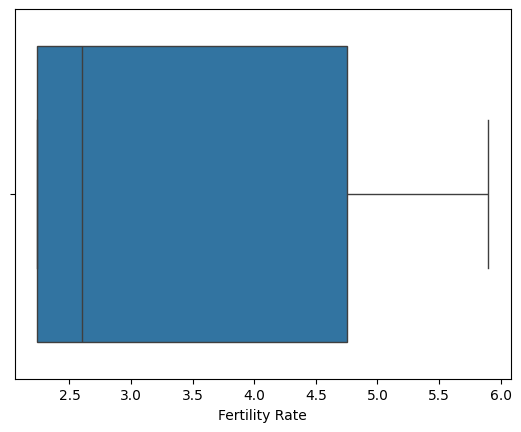

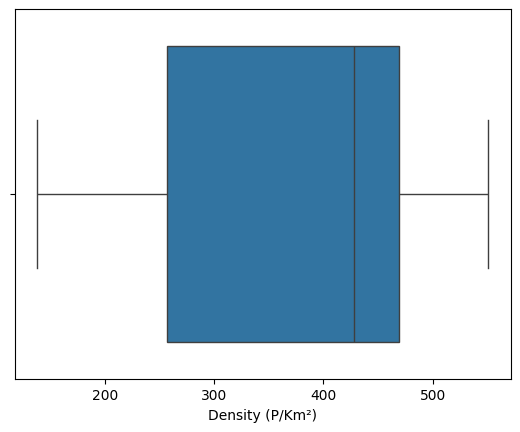

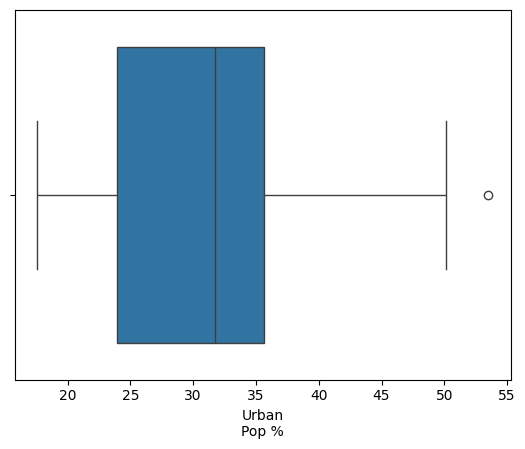

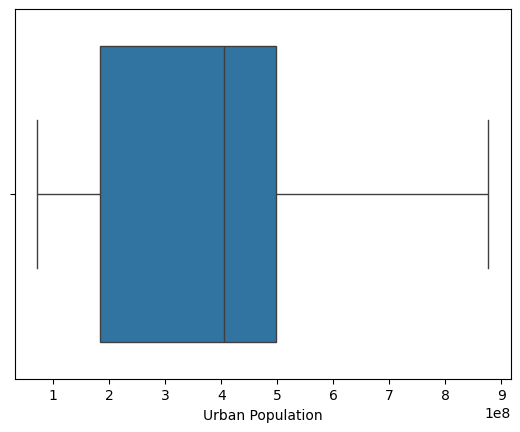

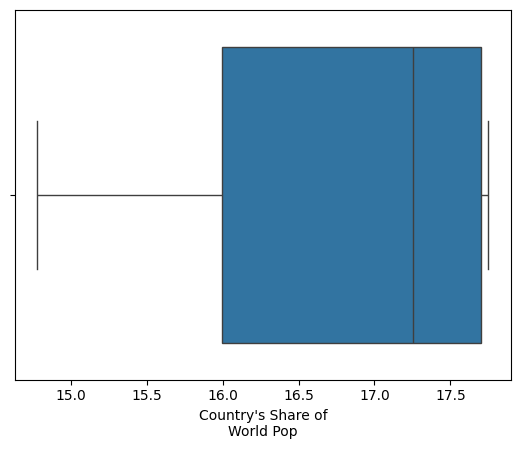

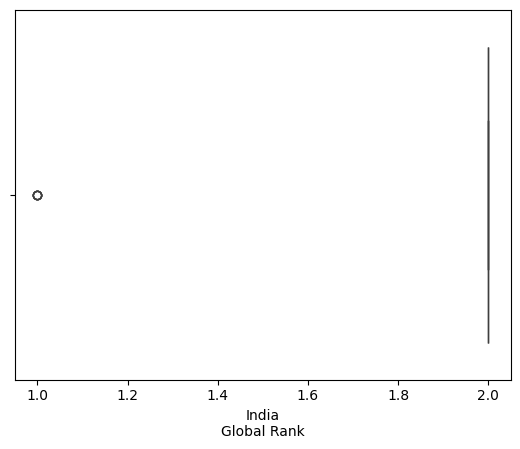

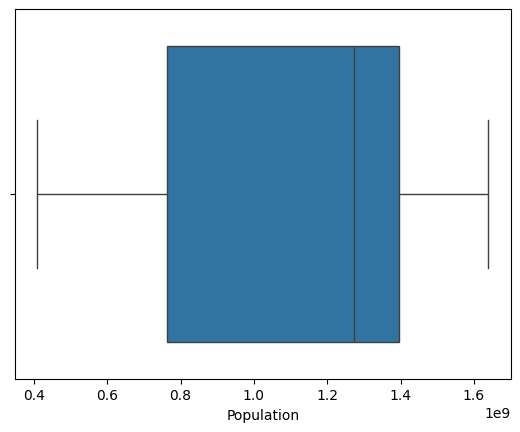

In [19]:
#boxplot to identify outliers

for i in popu_df.select_dtypes(include='number').columns:
    sns.boxplot(data=popu_df,x=i)
    plt.show()

Splitting the dataset into the Training set and Test set

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [23]:
popu_df.isnull().sum()

,0
Year,0
Yearly % \nChange,0
Yearly\nChange,0
Migrants (net),0
Median Age,0
Fertility Rate,0
Density (P/Km²),0
Urban\nPop %,0
Urban Population,0
Country's Share of\nWorld Pop,0


In [27]:
popu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Year                          24 non-null     float64
 1   Yearly % 
Change              24 non-null     float64
 2   Yearly
Change                 24 non-null     float64
 3   Migrants (net)                24 non-null     float64
 4   Median Age                    24 non-null     float64
 5   Fertility Rate                24 non-null     float64
 6   Density (P/Km²)               24 non-null     float64
 7   Urban
Pop %                   24 non-null     float64
 8   Urban Population              24 non-null     float64
 9   Country's Share of
World Pop  24 non-null     float64
 10  World Population              24 non-null     object 
 11  India
Global Rank             24 non-null     float64
 12  Population                    24 non-null     float64
dtypes: floa

In [26]:
popu_df['World Population']

,World Population
0,9735033990
1,9481803274
2,9198847240
3,8887524213
4,8548487400
5,8184437460
6,7794798739
7,7713468100
8,7631091040
9,7547858925


Training the Simple Linear Regression model on the Training set

In [21]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values